In [11]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns

In [2]:

# PostgreSQL connection details
postgres_user = 'postgres'
postgres_password = ''
postgres_host = 'localhost'
postgres_port = '5432'
postgres_db = 'football'

# Create a PostgreSQL connection using SQLAlchemy
postgres_uri = f'postgresql://{postgres_user}:{postgres_password}@{postgres_host}:{postgres_port}/{postgres_db}'
engine = create_engine(postgres_uri)

# Define table name (adjust if necessary)
table_name = 'man_city_fixtures_with_match_id'

# Read the table into a Pandas DataFrame
df = pd.read_sql_table(table_name, engine)

# Check the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

#

         Date           Time            Comp        Round  Day Venue Result  \
0  2023-08-11  20:00 (00:45)  Premier League  Matchweek 1  Fri  Away      W   
1  2023-08-19  20:00 (00:45)  Premier League  Matchweek 2  Sat  Home      W   
2  2023-08-27  14:00 (18:45)  Premier League  Matchweek 3  Sun  Away      W   
3  2023-09-02  15:00 (19:45)  Premier League  Matchweek 4  Sat  Home      W   
4  2023-09-16  15:00 (19:45)  Premier League  Matchweek 5  Sat  Away      W   

   GF  GA       Opponent   xG  xGA  Poss          Captain Formation  \
0   3   0        Burnley  1.9  0.3    65  Kevin De Bruyne   4-2-3-1   
1   1   0  Newcastle Utd  1.0  0.3    59      Kyle Walker   4-2-3-1   
2   2   1  Sheffield Utd  3.5  0.7    79      Kyle Walker   4-2-3-1   
3   5   1         Fulham  2.2  1.4    68      Kyle Walker   4-2-3-1   
4   3   1       West Ham  3.6  0.9    68      Kyle Walker   4-2-3-1   

  Opp Formation  match_id  
0         5-4-1         1  
1         4-3-3         2  
2         3-5-

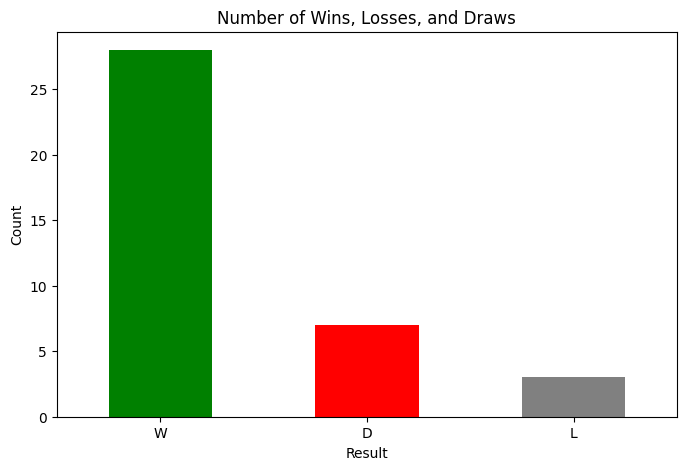

In [4]:
 # 1. **Wins, Losses, and Draws Visualization**

# Count the occurrences of 'W', 'L', 'D' in the 'Result' column
result_counts = df['Result'].value_counts()

# Plot the result counts
plt.figure(figsize=(8, 5))
result_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Number of Wins, Losses, and Draws')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()




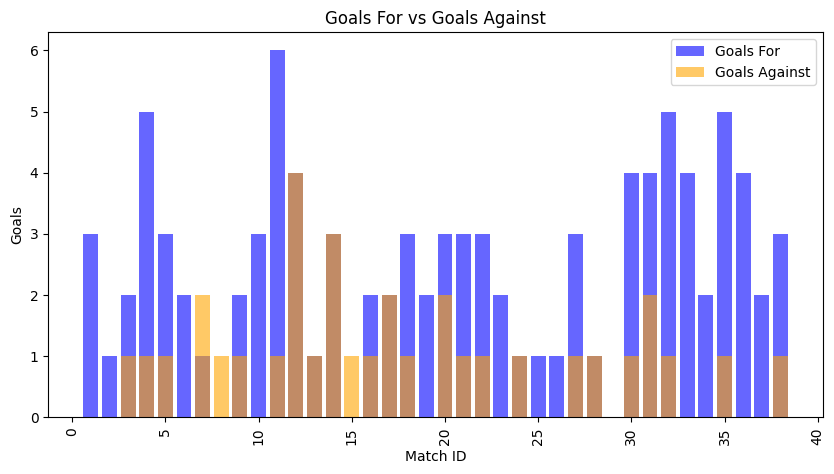

In [5]:
# 2. **Goals for (GF) and Goals against (GA) Comparison**

plt.figure(figsize=(10, 5))

# Plot GF vs GA (Goals For vs Goals Against)
plt.bar(df['match_id'], df['GF'], alpha=0.6, label='Goals For', color='blue')
plt.bar(df['match_id'], df['GA'], alpha=0.6, label='Goals Against', color='orange')

plt.title('Goals For vs Goals Against')
plt.xlabel('Match ID')
plt.ylabel('Goals')
plt.legend()
plt.xticks(rotation=90)
plt.show()


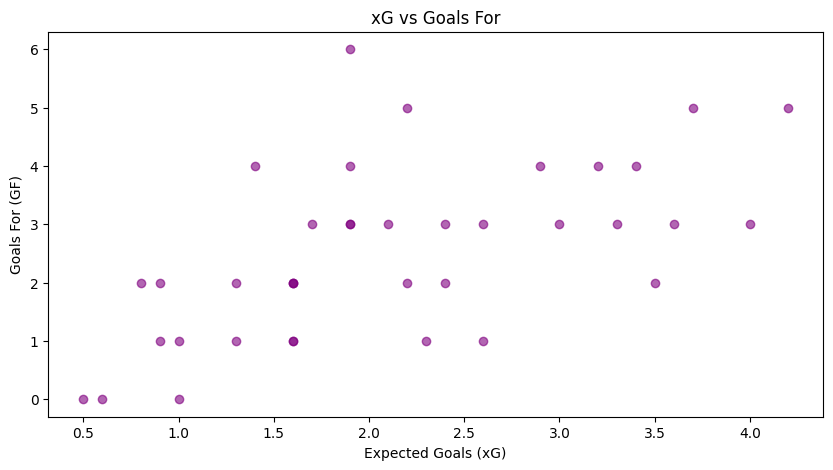

In [6]:

# 3. **xG vs Goals Visualization (Expected Goals vs Actual Goals)**

plt.figure(figsize=(10, 5))

# Plot xG vs GF (Expected Goals vs Actual Goals)
plt.scatter(df['xG'], df['GF'], color='purple', alpha=0.6)
plt.title('xG vs Goals For')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals For (GF)')
plt.show()


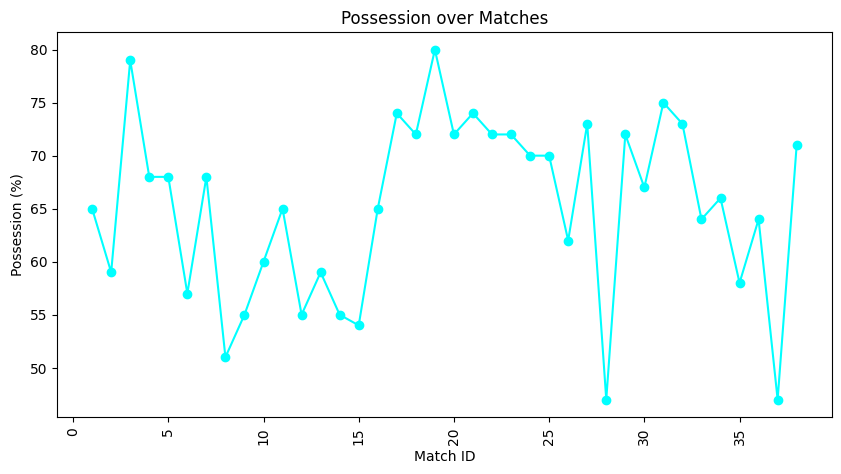

In [7]:

# 4. **Possession Analysis (Average Possession)**

# Convert 'Poss' to numeric (if not already) for calculation of the mean
df['Poss'] = pd.to_numeric(df['Poss'], errors='coerce')

# Plot the average possession
plt.figure(figsize=(10, 5))
plt.plot(df['match_id'], df['Poss'], label='Possession', marker='o', color='cyan')
plt.title('Possession over Matches')
plt.xlabel('Match ID')
plt.ylabel('Possession (%)')
plt.xticks(rotation=90)
plt.show()



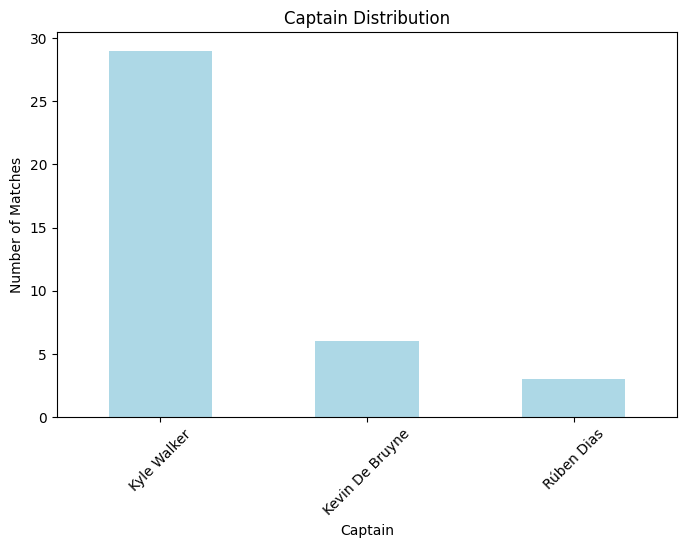

In [8]:
# 5. **Captain Distribution**

# Count the number of matches each player captained
captain_counts = df['Captain'].value_counts()

# Plot the captain distribution
plt.figure(figsize=(8, 5))
captain_counts.plot(kind='bar', color='lightblue')
plt.title('Captain Distribution')
plt.xlabel('Captain')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



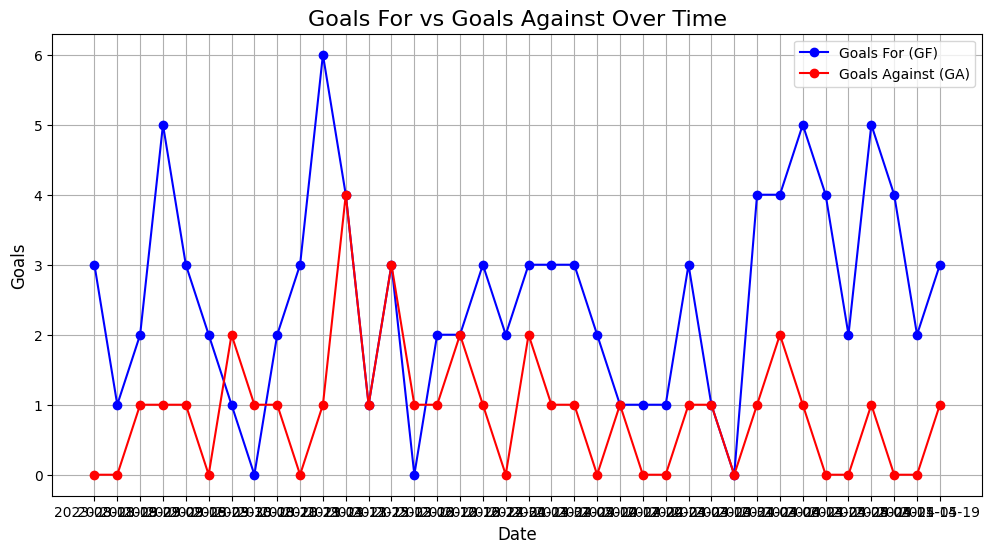

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['GF'], label='Goals For (GF)', marker='o', color='blue')
plt.plot(df['Date'], df['GA'], label='Goals Against (GA)', marker='o', color='red')
plt.title('Goals For vs Goals Against Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


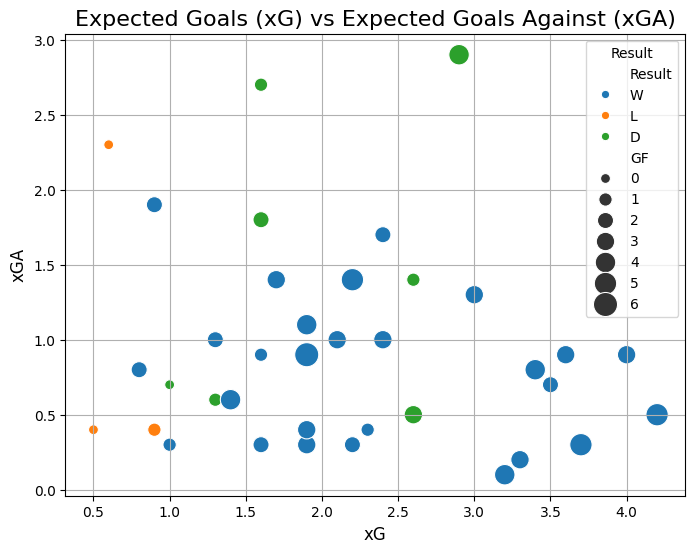

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='xG', y='xGA', hue='Result', size='GF', sizes=(50, 300))
plt.title('Expected Goals (xG) vs Expected Goals Against (xGA)', fontsize=16)
plt.xlabel('xG', fontsize=12)
plt.ylabel('xGA', fontsize=12)
plt.legend(title='Result')
plt.grid(True)
plt.show()


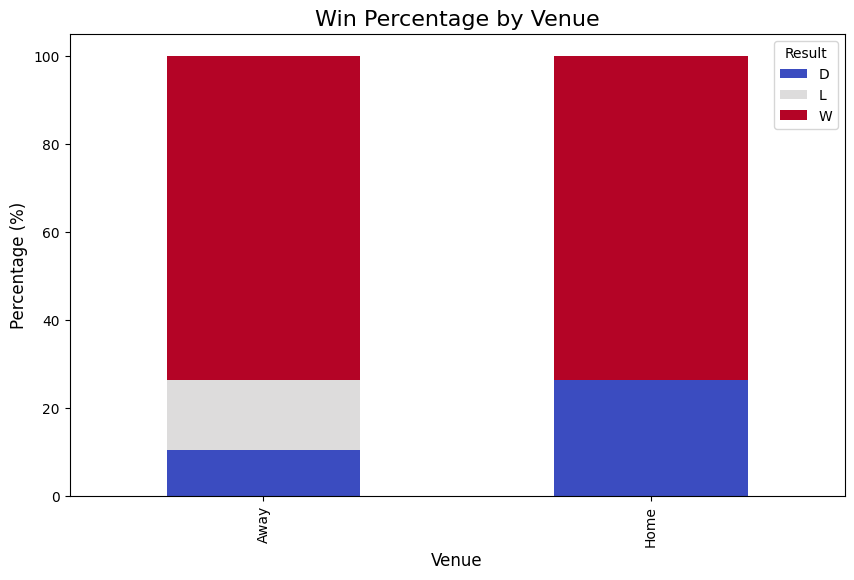

In [14]:
venue_result = df.groupby(['Venue', 'Result']).size().unstack(fill_value=0)
venue_result_percentage = venue_result.div(venue_result.sum(axis=1), axis=0) * 100

venue_result_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Win Percentage by Venue', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Result')
plt.show()


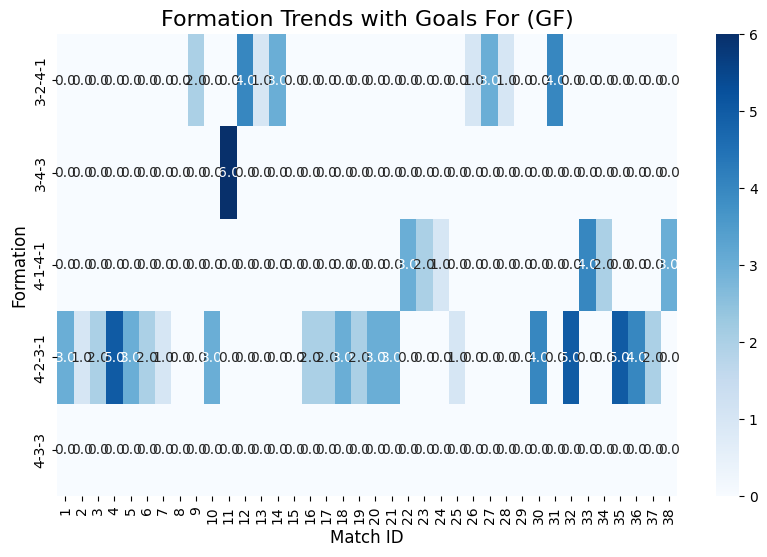

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Formation'], df['match_id'], values=df['GF'], aggfunc='sum').fillna(0), 
            cmap='Blues', annot=True, fmt='.1f')
plt.title('Formation Trends with Goals For (GF)', fontsize=16)
plt.xlabel('Match ID', fontsize=12)
plt.ylabel('Formation', fontsize=12)
plt.show()


C:\Users\khadk\AppData\Local\Temp\ipykernel_35164\2589515467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day', y='Poss', palette='Set2')


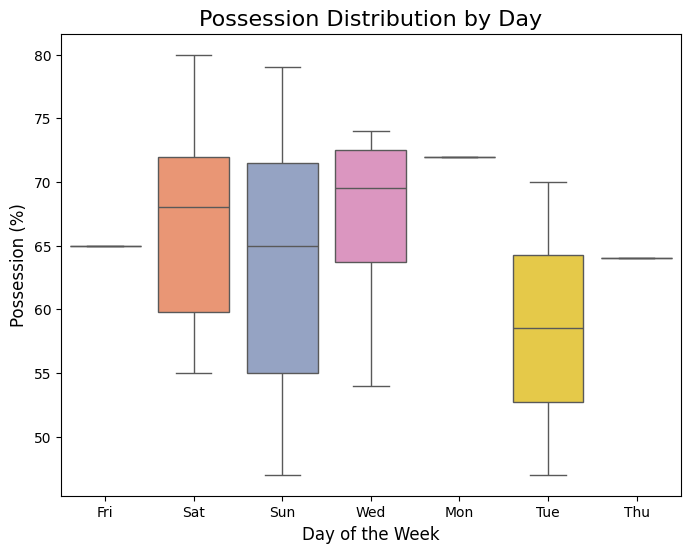

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Day', y='Poss', palette='Set2')
plt.title('Possession Distribution by Day', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Possession (%)', fontsize=12)
plt.show()


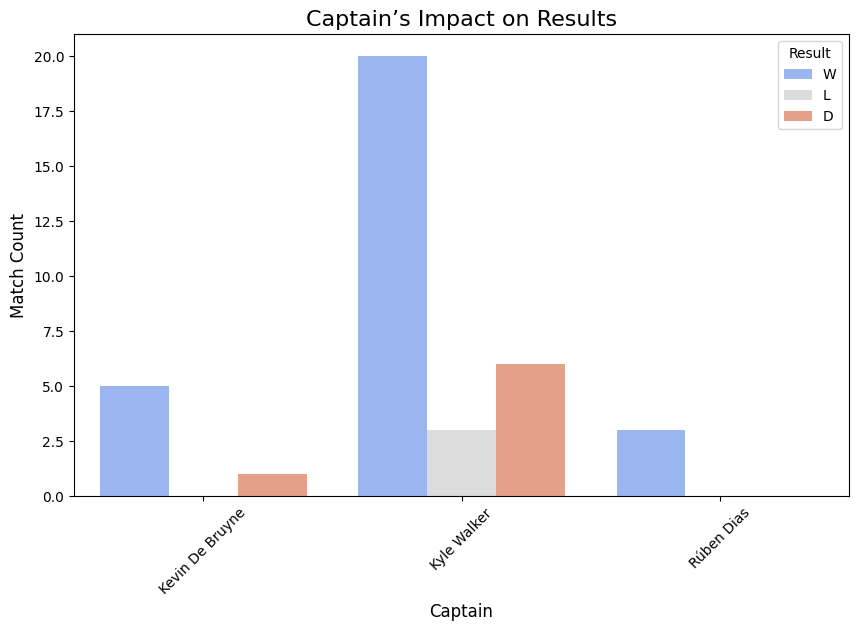

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Captain', hue='Result', palette='coolwarm')
plt.title('Captain’s Impact on Results', fontsize=16)
plt.xlabel('Captain', fontsize=12)
plt.ylabel('Match Count', fontsize=12)
plt.legend(title='Result')
plt.xticks(rotation=45)
plt.show()


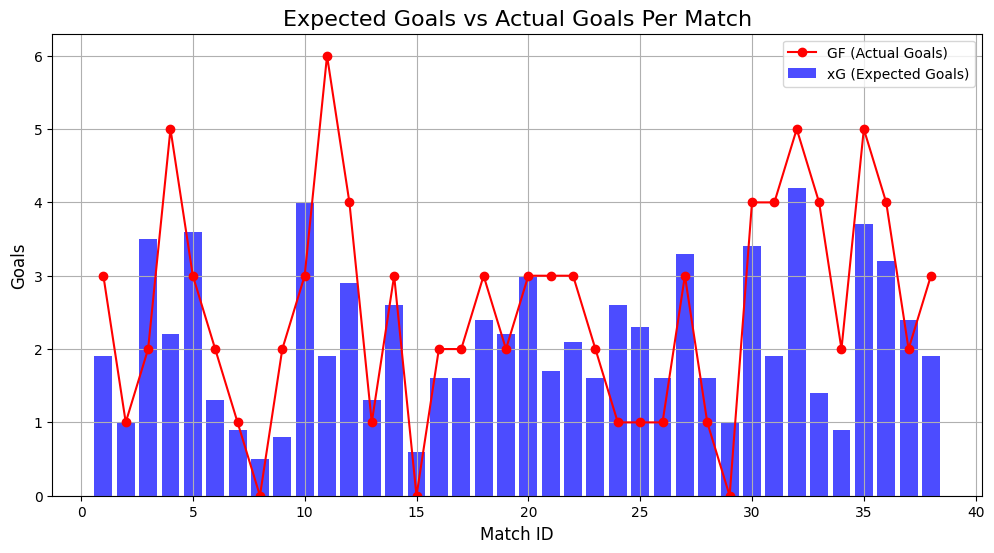

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(df['match_id'], df['xG'], color='blue', alpha=0.7, label='xG (Expected Goals)')
plt.plot(df['match_id'], df['GF'], marker='o', color='red', label='GF (Actual Goals)')
plt.title('Expected Goals vs Actual Goals Per Match', fontsize=16)
plt.xlabel('Match ID', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


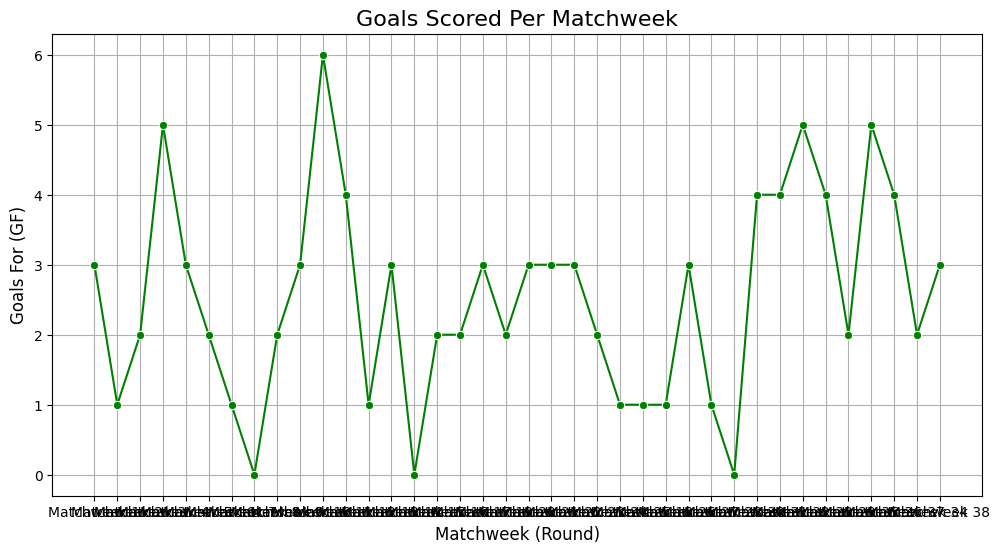

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Round', y='GF', marker='o', color='green')
plt.title('Goals Scored Per Matchweek', fontsize=16)
plt.xlabel('Matchweek (Round)', fontsize=12)
plt.ylabel('Goals For (GF)', fontsize=12)
plt.grid(True)
plt.show()


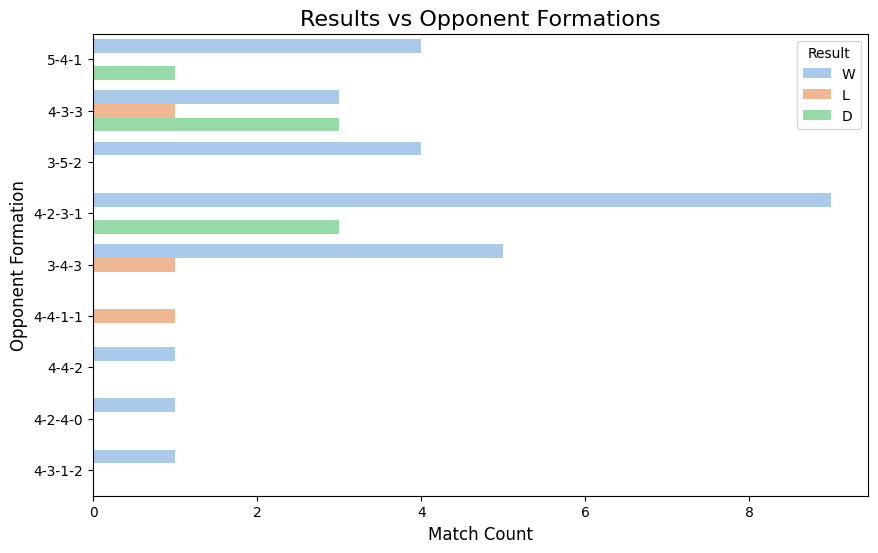

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Opp Formation', hue='Result', palette='pastel')
plt.title('Results vs Opponent Formations', fontsize=16)
plt.xlabel('Match Count', fontsize=12)
plt.ylabel('Opponent Formation', fontsize=12)
plt.legend(title='Result')
plt.show()


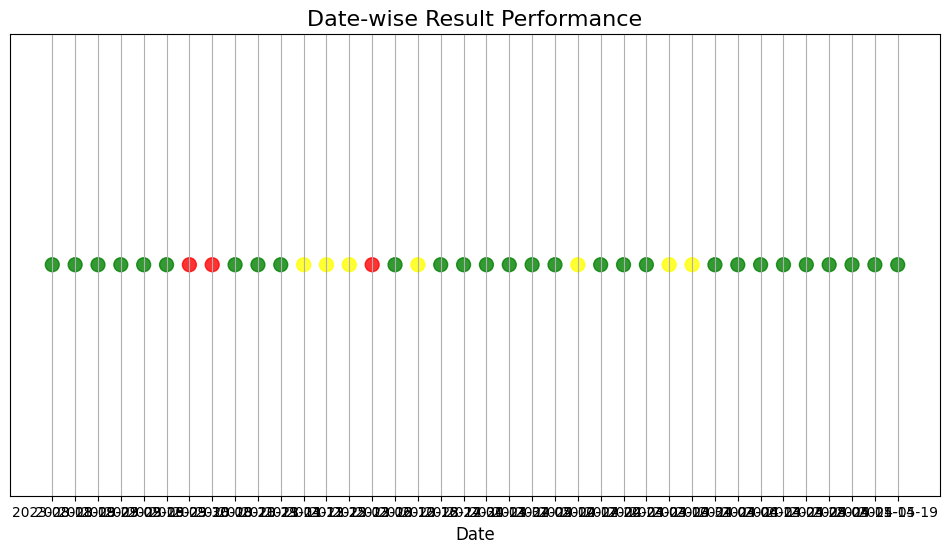

In [22]:
plt.figure(figsize=(12, 6))
result_colors = {'W': 'green', 'L': 'red', 'D': 'yellow'}
df['Result_Color'] = df['Result'].map(result_colors)

plt.scatter(df['Date'], [1] * len(df), c=df['Result_Color'], s=100, alpha=0.8)
plt.title('Date-wise Result Performance', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.yticks([])
plt.grid(axis='x')
plt.show()
